In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


In [2]:
# create simple control setup
# New Antecedent/Consequent objects hold universe variables and membership
# functions
# th1 = ctrl.Antecedent(np.arange(0, 180, 1), 'th1')
# th2 = ctrl.Antecedent(np.arange(-90, 90, 1), 'th2')
a_x = ctrl.Antecedent(np.arange(-10, 10, 1), 'a_x')
a_y = ctrl.Antecedent(np.arange(-10, 10, 1), 'a_y')
servo = ctrl.Consequent(np.arange(0, 180, 1), 'servo')

# Auto-membership function population is possible with .automf(3, 5, or 7)
# th1.automf(3)
# th2.automf(3)
a_x.automf(3)
a_y.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
servo['low'] = fuzz.trimf(servo.universe, [60, 90, 120])
servo['medium'] = fuzz.trimf(servo.universe, [30, 45, 60])
servo['high'] = fuzz.trimf(servo.universe, [0, 15, 30])

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

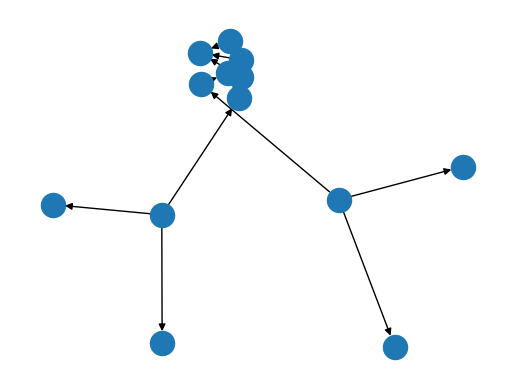

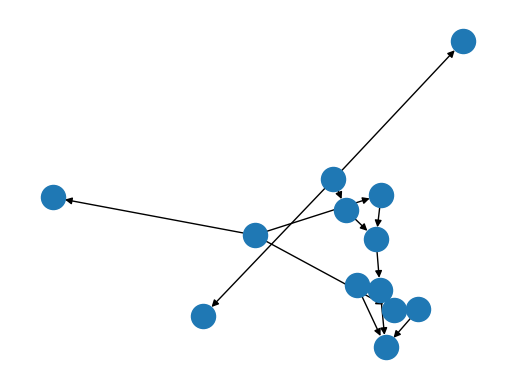

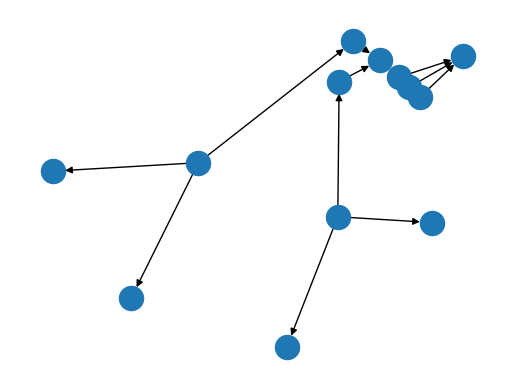

In [10]:
# creating rules...
rule1 = ctrl.Rule(a_x['good'] & a_y['poor'], servo['low'])
rule2 = ctrl.Rule(a_x['average'] & a_y['average'], servo['medium'])
rule3 = ctrl.Rule(a_x['poor'] & a_y['good'], servo['high'])

# displaying rule views
rule1.view()
rule2.view()
rule3.view()

In [11]:
servo_ctrl_rules = ctrl.ControlSystem([rule1, rule2, rule3])
servo_ctrl = ctrl.ControlSystemSimulation(servo_ctrl_rules)

In [7]:
# servo_ctrl.view()
servo.view()
a_x.view()
a_y.view()

AttributeError: 'ControlSystemSimulation' object has no attribute 'view'

34.81651376146791


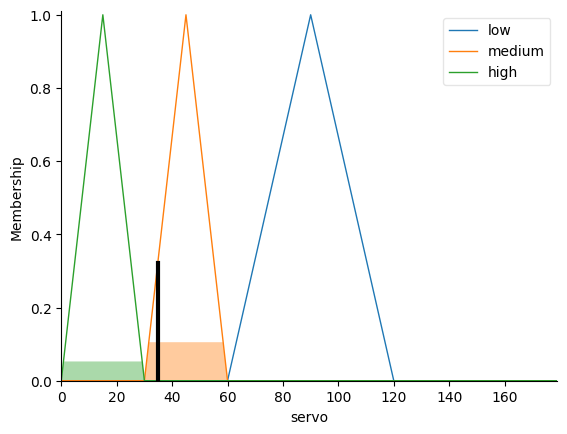

In [23]:
servo_ctrl.input['a_x'] = -9
servo_ctrl.input['a_y'] = 0

# Crunch the numbers
servo_ctrl.compute()

print(servo_ctrl.output['servo'])
servo.view(sim=servo_ctrl)